***
# Midterm

**Course:** MATH 616 - Data-Driven Dynamical Systems, Stochastic Modeling and Prediction

**Name:** Shrivats Sudhir

**NetID:** ssudhir2

**Email:** ssudhir2@wisc.edu
***

In [19]:
import numpy as np
from numpy import linalg
import pandas as pd
import matplotlib.pyplot as plt
from joblib import Parallel, delayed
from scipy.optimize import curve_fit
from scipy.stats import norm
from scipy.stats import multivariate_normal

# Question 1.

**Consider the following linear Gaussian SDE:**
$$dx_t = -x_t\;dt + dW_t, \quad x_0=1$$

We can re-write the above as:
$$dx_t = (-a x_t + f_t) d_t + \sigma dW_t$$

where $a=1$, $f_t=0$ and $\sigma=1$

## (a.)

**Use the Euler-Maruyama method to create a numerical simulation. Plot a time series to illustrate the solution.**

Mean of X_t: -0.2855
Standard Deviation of X_t: 0.4977
Variance of X_t: 0.2477
Max of X_t: 1.2202
Min of X_t: -1.6856


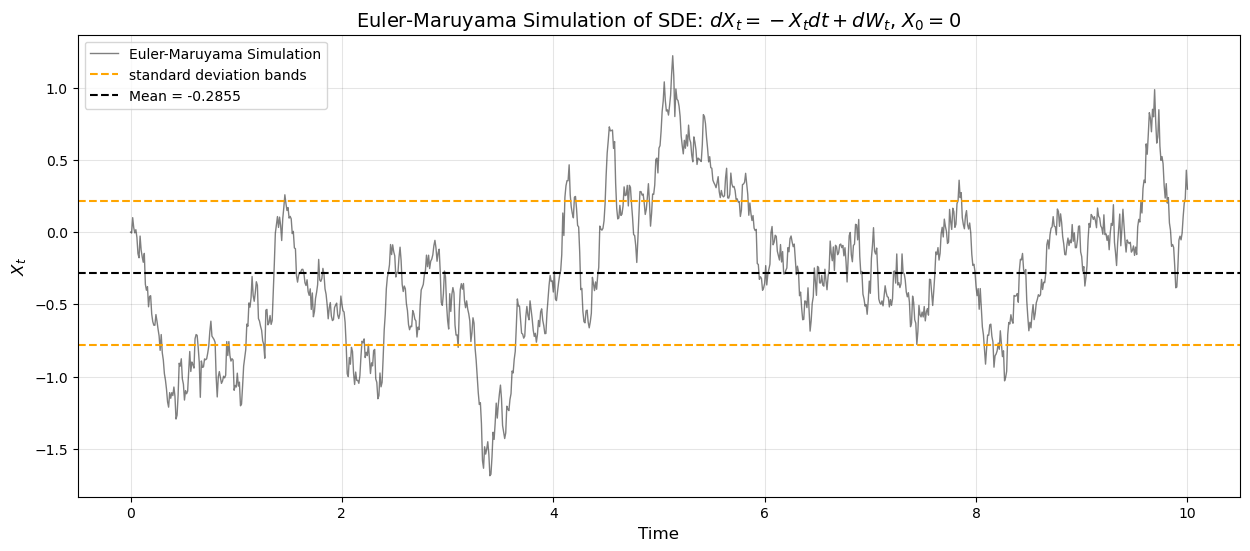

In [20]:
def dXt(Xt, dt, dWt):
    """
    SDE function for the time derivative of Xt: dX_t = -X_t * dt + dW_t
    
    Parameters:
    - Xt (float): The current value of the process Xt.
    - dt (float): The time step size.
    - dWt (float): The Wiener process increment (random term).
    
    Returns:
    - (float): The time derivative of Xt based on the current value, time step size, and random increment.
    """
    return -Xt * dt + dWt

def euler_maruyama(T, N, X0):
    """
    Euler-Maruyama method to numerically solve the stochastic differential equation (SDE):
    dX_t = -X_t dt + dW_t, X_0 = X0
    
    Parameters:
    - T (float): The total simulation time.
    - N (int): The number of time steps.
    - X0 (float): The initial value of the process Xt at time t=0.
    
    Returns:
    - t (numpy.ndarray): Array of time points from 0 to T.
    - Xt (numpy.ndarray): Array of simulated values of the process Xt at each time step.
    """
    dt = T / N
    t = np.linspace(0, T, N+1)
    
    Xt = np.zeros(N+1)
    Xt[0] = X0  # Initial condition
    
    # Simulating the process using Euler-Maruyama
    for i in range(1, N+1):
        dWt = np.sqrt(dt) * np.random.normal(0, 1)  # Wiener process increment
        Xt[i] = Xt[i-1] + dXt(Xt[i-1], dt, dWt)     # Euler-Maruyama scheme
    
    return t, Xt

def statistics_TS(Xt):
    """
    Calculate and print simple statistics for the time series Xt.
    
    Parameters:
    - Xt (numpy.ndarray): Array of simulated values of the process Xt.
    
    Returns:
    - mean_xt (float): The mean of the time series Xt.
    - std_xt (float): The standard deviation of the time series Xt.
    """
    mean_xt = np.mean(Xt)
    std_xt = np.std(Xt)
    var_xt = np.var(Xt)
    max_xt = np.max(Xt)
    min_xt = np.min(Xt)
    
    print(f"Mean of X_t: {mean_xt:.4f}")
    print(f"Standard Deviation of X_t: {std_xt:.4f}")
    print(f"Variance of X_t: {var_xt:.4f}")
    print(f"Max of X_t: {max_xt:.4f}")
    print(f"Min of X_t: {min_xt:.4f}")
    
    return mean_xt, std_xt

# Run simulation and collect the respective t and Xt values
T = 10              # Small total time
N = 1000            # Number of steps
X0 = 1              # Initial condition
t, Xt = euler_maruyama(T=T, N=N, X0=0)

# Calculate statistics
mean_xt, std_xt = statistics_TS(Xt)

# Create the plot with explicit facecolor for axes
fig, ax = plt.subplots(figsize=(15, 6))
fig.patch.set_facecolor('white')  # Set the figure background to white
ax.set_facecolor('white')         # Set the axis background to white

ax.plot(t, Xt, alpha=0.5, color='black', label='Euler-Maruyama Simulation', linewidth=1)
ax.axhline(y=mean_xt-std_xt, color="orange", linestyle="--", label=f"standard deviation bands")
ax.axhline(y=mean_xt, color="black", linestyle="--", label=f"Mean = {mean_xt:.4f}")
ax.axhline(y=mean_xt+std_xt, color="orange", linestyle="--")
ax.set_title(f'Euler-Maruyama Simulation of SDE: $dX_t = -X_t dt + dW_t$, $X_0 = {0}$', fontsize=14)
ax.set_xlabel('Time', fontsize=12)
ax.set_ylabel('$X_t$', fontsize=12)
ax.grid(True, color='black', alpha=0.1)
ax.legend()

plt.show()

## (b.)

**Using time series data from your numerical simulation, find a numerical estimate of $\langle x_t^2 \rangle$ in statistical equilibrium (for large time $t$).**

Theoretically, we know that the long-run equilibrium solution of the mean and variance (6.2 Statistical Equilibrium State and Decorrelation Time) is given by:
$$\mu(x)_{\infty} = \frac{f}{a} = \frac{0}{1} = 0$$


$$\text{Var}(x)_{\infty} = \frac{\sigma^2}{2a} = \frac{1^2}{2 \cdot 1} = 0.5$$

Theoretical estimate of ⟨x_t⟩ in equilibrium: 0
Numerical estimate of ⟨x_t^2⟩ in equilibrium: 0.5


Numerical estimate of ⟨x_t⟩ in equilibrium: 0.0217
Numerical estimate of ⟨x_t^2⟩ in equilibrium: 0.5052




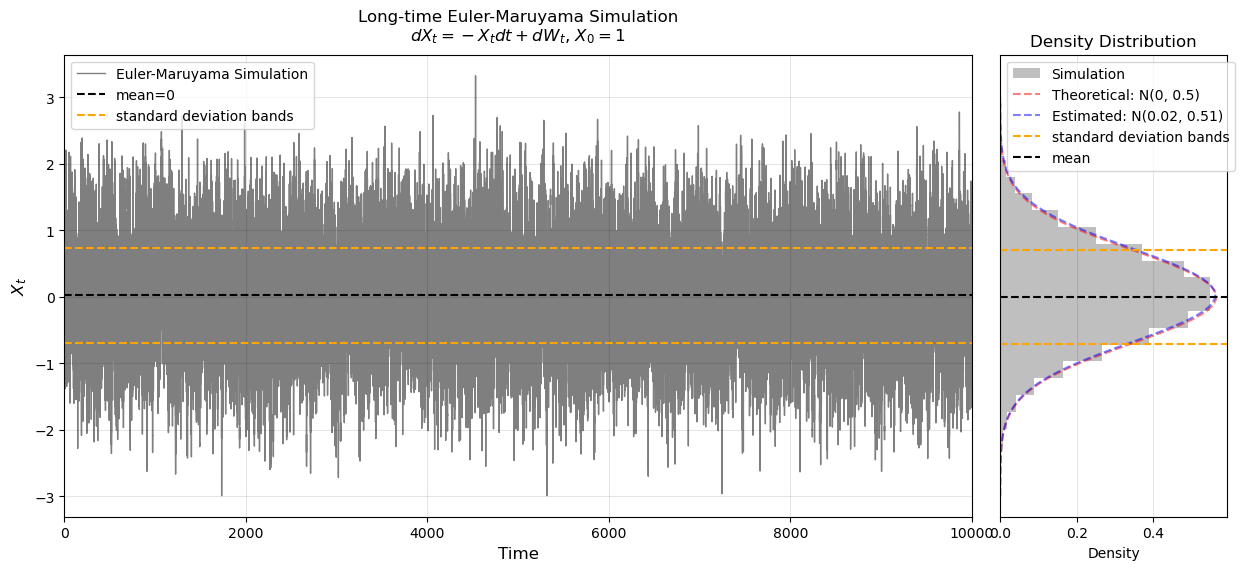

In [21]:
def estimate_mean_var(Xt):
    """
    Calculate the sample estimates of the first moment (mean) and the second moment 
    (not centralized) of the given time series Xt.
    
    Parameters:
    - Xt (numpy.ndarray): Array of simulated values of the process Xt.

    Returns:
    - mean_xt (float): The first moment, i.e., the sample mean of Xt.
    - second_moment_xt (float): The second moment (not centralized), i.e., the sample mean of Xt squared.
    """
    return np.mean(Xt), np.mean(Xt**2)

# Run simulation and collect the respective t and Xt values
T = 10000           # Large total time
N = 1000000         # Number of steps
X0 = 1              # Initial condition
t, Xt = euler_maruyama(T, N, X0)

# Theoretical distribution
mean, std = 0, np.sqrt(0.5)
print(f"Theoretical estimate of ⟨x_t⟩ in equilibrium: {0}")
print(f"Numerical estimate of ⟨x_t^2⟩ in equilibrium: {0.5}")
print("\n")

# Calculate equilibrium (long-run) first moment and second moment (not centralized)
x_mean_equilibrium, x_squared_mean_equilibrium = estimate_mean_var(Xt)
print(f"Numerical estimate of ⟨x_t⟩ in equilibrium: {x_mean_equilibrium:.4f}")
print(f"Numerical estimate of ⟨x_t^2⟩ in equilibrium: {x_squared_mean_equilibrium:.4f}")
print("\n")

# Create figure with custom layout
fig = plt.figure(figsize=(15, 6))
gs = plt.GridSpec(1, 2, width_ratios=[4, 1], wspace=0.05)

# Left subplot: Time series (larger)
ax1 = plt.subplot(gs[0])
ax1.plot(t, Xt, alpha=0.5, color='black', label='Euler-Maruyama Simulation', linewidth=1)
ax1.axhline(y=x_mean_equilibrium, color="black", linestyle='--', label="mean=0")
ax1.axhline(y=x_mean_equilibrium+np.sqrt(x_squared_mean_equilibrium), 
            color="orange", linestyle="--", label="standard deviation bands")
ax1.axhline(y=x_mean_equilibrium-np.sqrt(x_squared_mean_equilibrium), 
            color="orange", linestyle="--")
ax1.set_title('Long-time Euler-Maruyama Simulation\n$dX_t = -X_t dt + dW_t$, $X_0 = 1$', pad=10)
ax1.set_xlabel('Time', fontsize=12)
ax1.set_ylabel('$X_t$', fontsize=12)
ax1.set_xlim(0, 10000)
ax1.set_facecolor('white')
ax1.grid(True, color='black', alpha=0.1)
ax1.legend()

# Right subplot: Rotated histogram
ax2 = plt.subplot(gs[1])
ax2.hist(Xt, bins=25, density=True, orientation='horizontal',
         alpha=0.5, color='grey', label='Simulation')

y = np.linspace(-3, 3, 100)
pdf1 = norm.pdf(y, mean, std)
ax2.plot(pdf1, y, alpha=0.5, color="red", 
         linestyle='--', label='Theoretical: N(0, 0.5)')

pdf2 = norm.pdf(y, x_mean_equilibrium, np.sqrt(x_squared_mean_equilibrium))
ax2.plot(pdf2, y, alpha=0.5, color="blue",
         linestyle='--', label=f'Estimated: N({np.round(x_mean_equilibrium, 2)}, {np.round(x_squared_mean_equilibrium, 2)})')

ax2.axhline(y=mean+std, color="orange", linestyle="--", label="standard deviation bands")
ax2.axhline(y=mean-std, color="orange", linestyle="--")
ax2.axhline(y=0, color="black", linestyle='--', label='mean')
ax2.set_title('Density Distribution')
ax2.set_xlabel('Density')
ax2.set_ylabel('')
ax2.set_facecolor('white')
ax2.grid(True, color='black', alpha=0.1)
ax2.legend()

ylim = ax1.get_ylim()
ax2.set_ylim(ylim)
ax2.set_yticks([])

plt.show()

## (c.)

**Using time series data from your numerical simulation, find a numerical estimate of the autocorrelation function, $R(s)$.**

From definition 6.1, we know that the auto-correlation function $(ACF)$ is:
$$R(s) = \frac{\mathbb{E}[(X_t - \mu_{\infty})(X_{t+s} - \mu_{\infty})]}{\text{Var}(x)_{\infty}}$$

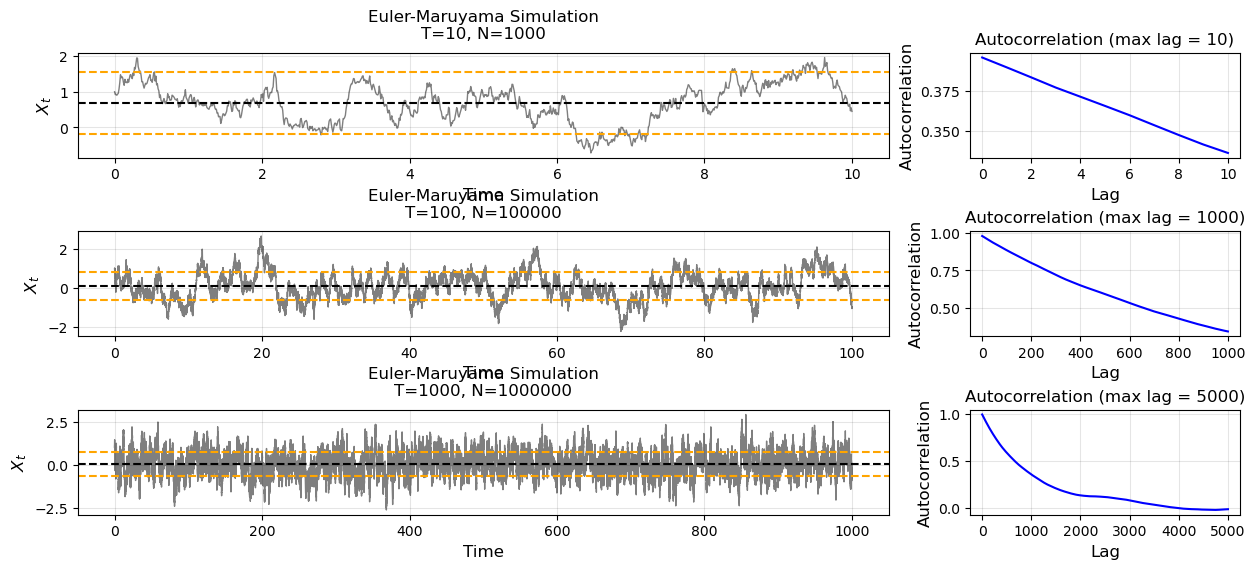

In [22]:
def estimate_autocorrelation(Xt, mean_inf, var_inf, max_lag):
    """
    Calculate the sample estimates of the autocorrelation function for a given 
    time series Xt up to a specified maximum lag.
    
    The autocorrelation at lag s is estimated using the formula:
    R[s] = sum((Xt[:N-s] - mean_inf) * (Xt[s:N] - mean_inf)) / var_inf
    
    Parameters:
    - Xt (numpy.ndarray): Array of simulated values of the process Xt.
    - mean_inf (float): The mean of the time series Xt (used to centralize the data).
    - var_inf (float): The variance of the time series Xt (used to normalize the autocorrelation).
    - max_lag (int): The maximum lag for which to compute the autocorrelation.
    
    Returns:
    - lags (range): The range of lag values from 0 to max_lag.
    - R (numpy.ndarray): Array of autocorrelation values for each lag from 0 to max_lag.
    """
    N = len(Xt)
    R = np.zeros(max_lag+1)

    for s in range(max_lag+1):
        R[s] = np.mean((Xt[:N-s] - mean_inf) * (Xt[s:N] - mean_inf)) / var_inf

    return range(max_lag+1), R

# Run simulation and collect the respective t and Xt values
T = 10           # Large total time
N = 1000         # Number of steps
X0 = 1           # Initial condition
t, Xt = euler_maruyama(T, N, X0)
x_mean_equilibrium, x_squared_mean_equilibrium = estimate_mean_var(Xt)

# Parameters for each subplot to create a 3-row, 2-column plot with different T and N
T_values = [10, 100, 1000]          # Different time horizons
N_values = [1000, 100000, 1000000]  # Different number of steps
max_lags = [10, 1000, 5000]         # Different max lags
X0 = 1                              # Initial condition

# Create figure for the new layout with adjusted width ratios
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 6), gridspec_kw={'width_ratios': [3, 1]})
fig.subplots_adjust(hspace=0.7, wspace=0.15)

# Loop through each row for different T, N, and max_lag values
for i in range(3):
    
    # Run simulation with different T and N values
    t, Xt = euler_maruyama(T=T_values[i], N=N_values[i], X0=X0)
    x_mean_equilibrium, x_squared_mean_equilibrium = estimate_mean_var(Xt)

    # Estimate auto-correlation for each combination
    lags, correlations = estimate_autocorrelation(Xt=Xt, 
                                                  mean_inf=x_mean_equilibrium, 
                                                  var_inf=x_squared_mean_equilibrium, 
                                                  max_lag=max_lags[i])

    # Plot the time series on the left column
    axs[i, 0].plot(t, Xt, alpha=0.5, color='black', linewidth=1)
    axs[i, 0].axhline(y=x_mean_equilibrium, color="black", linestyle='--', label=f"mean")
    axs[i, 0].axhline(y=x_mean_equilibrium+np.sqrt(x_squared_mean_equilibrium), 
                color="orange", linestyle="--", label="standard deviation bands")
    axs[i, 0].axhline(y=x_mean_equilibrium-np.sqrt(x_squared_mean_equilibrium), 
                color="orange", linestyle="--")
    axs[i, 0].set_title(f'Euler-Maruyama Simulation\nT={T_values[i]}, N={N_values[i]}', pad=10)
    axs[i, 0].set_xlabel('Time', fontsize=12)
    axs[i, 0].set_ylabel('$X_t$', fontsize=12)
    axs[i, 0].grid(True, color='black', alpha=0.1)
    axs[i, 0].set_facecolor('white')

    # Plot the auto-correlation function on the right column
    axs[i, 1].plot(lags, correlations, color='blue', label="R(s)")
    axs[i, 1].set_title(f'Autocorrelation (max lag = {max_lags[i]})')
    axs[i, 1].set_xlabel('Lag', fontsize=12)
    axs[i, 1].set_ylabel('Autocorrelation', fontsize=12)
    axs[i, 1].grid(True, color='black', alpha=0.1)
    axs[i, 1].set_facecolor('white')

plt.show()

# Question 2.

**Consider the following ODE system:**

$$\frac{du_1}{dt} = -2u_1 + u_2 + 1$$
$$\frac{du_2}{dt} = 2u_1 - 3u_2 + 1$$

## (a.)

**Derive the analytic solution of this system using the eigen-decomposition method.**

We can re-write the ODE system of equation as follows:
$$\frac{d\mathbf{u}}{dt} = \underbrace{\begin{bmatrix} -2 & 1\\ 2 & -3 \end{bmatrix}}_{=\mathbf{A}} \cdot \underbrace{\begin{bmatrix} u_1\\ u_2 \end{bmatrix}}_{=\mathbf{u}} + \underbrace{\begin{bmatrix} 1\\ 1 \end{bmatrix}}_{=\mathbf{b}}$$

Now, in order to make the above ODE system homogenous:
\begin{equation*}
    \begin{split}
        0 &= \begin{bmatrix} -2 & 1\\ 2 & -3 \end{bmatrix} \cdot \begin{bmatrix} u^*_1\\ u^*_2 \end{bmatrix} + \begin{bmatrix} 1\\ 1 \end{bmatrix}\\
        \\
        \begin{bmatrix} -1\\ -1 \end{bmatrix} &= \begin{bmatrix} -2 & 1\\ 2 & -3 \end{bmatrix} \cdot \begin{bmatrix} u^*_1\\ u^*_2 \end{bmatrix}\\
        \\
    \end{split}
\end{equation*}

We can now solve for $u^*_1$ and $u^*_2$ simultaneously as:
$$-1 = -2u^*_1 + u^*_2$$
$$-1 = 2u^*_1 - 3u^*_2$$

In [23]:
# Defining matrix A
A = np.array([[-2, 1], 
              [2, -3]])

# Solving for u*1 and u*2
u1, u2 = np.linalg.solve(A,  np.array([-1, -1]))
print(f"u*1 = {u1}, u*2 = {u2}")

u*1 = 1.0, u*2 = 1.0


Defining a new variable $\mathbf{v} = \mathbf{u} - \mathbf{u}^* = \begin{bmatrix} u_1-1 \\ u_2-1 \end{bmatrix}$, our homogenous ODE system in vector form can now be written as:
$$\frac{d\mathbf{v}}{dt} + \mathbf{\tilde{A}}\mathbf{v} = 0$$
where $\mathbf{\tilde{A}} = -\mathbf{A} = \begin{bmatrix} 2 & -1\\ -2 & 3 \end{bmatrix}$

Now, we know that the eigenvalues of $\mathbf{\tilde{A}}$ can be computed as:
$$\mathbf{\tilde{A}}\mathbf{c} = \lambda \mathbf{c}$$

which, in matrix form can be re-written as:
$$\mathbf{\tilde{A}}\mathbf{C} = \mathbf{C} \Lambda$$
where $\Lambda$ is the diagonal matrix containing eigenvalues, and $\mathbf{C}$ is the matrix containing eigenvectors as columns.

Finally, we conclude that:
$$\mathbf{\tilde{A}} = \mathbf{C} \Lambda \mathbf{C}^{-1}$$

In [24]:
# Defining tilde{A} = -A
A_tilde = np.array([[2, -1], 
                    [-2, 3]])

# Computing eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(A_tilde)

# Representing eigenvalues as a diagonal matrix
L = np.diag(eigenvalues)

# Representing eigenvectors as columns of a matrix
C = eigenvectors

print("eigenvalues as a diagonal matrix (lambda):\n", L)
print('\n')
print("eigenvectors as columns of matrix (C):\n", C)
print('\n')
print("Confirming eigen-decomposition procedure (A - C^-1 * L * C) ≈ 0:\n", A_tilde - (C @ L @ linalg.inv(C)))

eigenvalues as a diagonal matrix (lambda):
 [[1. 0.]
 [0. 4.]]


eigenvectors as columns of matrix (C):
 [[-0.70710678  0.4472136 ]
 [-0.70710678 -0.89442719]]


Confirming eigen-decomposition procedure (A - C^-1 * L * C) ≈ 0:
 [[ 0.00000000e+00  0.00000000e+00]
 [-2.22044605e-16  0.00000000e+00]]


Therefore, we now have that:
$$\Lambda = \begin{bmatrix} \lambda_1 & 0\\ 0 & \lambda_2 \end{bmatrix} = \begin{bmatrix} 1 & 0\\ 0 & 4 \end{bmatrix}, C = \begin{bmatrix} C_{00} & C_{01}\\ C_{10} & C_{11} \end{bmatrix} = \begin{bmatrix} -0.70710678 & 0.4472136\\ -0.70710678 & -0.89442719 \end{bmatrix}$$

which lets us write our homogenous ODE as:
\begin{equation*}
    \begin{split}
        0 &= \frac{d\mathbf{v}}{dt} + \mathbf{\tilde{A}}\mathbf{v}\\
        \\
          &= \frac{d\mathbf{v}}{dt} + (\mathbf{C} \Lambda \mathbf{C}^{-1})\mathbf{v}\\
        \\
          &= \mathbf{C}^{-1}\frac{d\mathbf{v}}{dt} + \Lambda (\mathbf{C}^{-1}\mathbf{v})
    \end{split}
\end{equation*}

Now, suppose $\mathbf{w} = \mathbf{C}^{-1}\mathbf{v}$, then our ODE can now bw written as:
$$\frac{d\mathbf{w}}{dt} + \Lambda \mathbf{w} = 0$$

As we know $\Lambda$ is a diagonal matrix, we can look at each vector element $w_i$ and solve the respective ODE as follows:
\begin{equation*}
    \begin{split}
        0 &= \frac{dw_i}{dt} + \lambda_i w_i\\
        \\
        -\lambda_i w_i &= \frac{dw_i}{dt}\\
        \\
        -\lambda_i d_t &= \frac{1}{w_i} dw_i\\
        \\
        \int -\lambda_i d_t &= \int \frac{1}{w_i} dw_i\\
        \\
        k_i \cdot \text{exp}(-\lambda_i t) &= w_i
    \end{split}
\end{equation*}

Therefore, we can re-write vector $\mathbf{w}$ as follows:
$$\mathbf{w} = \begin{bmatrix} k_1 \cdot \text{exp}(-\lambda_1 t)\\ k_2 \cdot \text{exp}(-\lambda_2 t) \end{bmatrix}$$

Substituting the eigenvalues $\lambda_1=1$ and $\lambda_2=4$, we have that:
$$\mathbf{w} = \begin{bmatrix} k_1 \cdot \text{exp}(-t)\\ k_2 \cdot \text{exp}(-4t) \end{bmatrix}$$

Now, as $\mathbf{w} = \mathbf{C}^{-1}\mathbf{v} \iff \mathbf{C} \mathbf{w} = \mathbf{v}$, we have that:
$$\mathbf{v} = \begin{bmatrix} C_{00} & C_{01}\\ C_{10} & C_{11} \end{bmatrix} \cdot \begin{bmatrix} k_1 \cdot \text{exp}(-t)\\ k_2 \cdot \text{exp}(-4t) \end{bmatrix} = \begin{bmatrix} C_{00} \cdot k_1 \cdot \text{exp}(-t) + C_{01} \cdot k_2 \cdot \text{exp}(-4t)\\ C_{10} \cdot k_1 \cdot \text{exp}(-t) + C_{11} \cdot k_2 \cdot \text{exp}(-4t) \end{bmatrix}$$

Finally, as $\mathbf{u} = \mathbf{u} - \mathbf{u}^* \iff \mathbf{v} + \mathbf{u}^* = \mathbf{u}$, we have that:
$$\mathbf{u} = \begin{bmatrix} C_{00} \cdot k_1 \cdot \text{exp}(-t) + C_{01} \cdot k_2 \cdot \text{exp}(-4t) + 1\\ C_{10} \cdot k_1 \cdot \text{exp}(-t) + C_{11} \cdot k_2 \cdot \text{exp}(-4t) + 1 \end{bmatrix}$$

In other words, the analytical solution of the ODE is:
$$u_1 = C_{00} \cdot k_1 \cdot \text{exp}(-t) + C_{01} \cdot k_2 \cdot \text{exp}(-4t) + 1$$
$$u_2 = C_{10} \cdot k_1 \cdot \text{exp}(-t) + C_{11} \cdot k_2 \cdot \text{exp}(-4t) + 1$$

In [25]:
def u1(k1, k2, t):
    """
    Analytical solution for u1, given constants k1, k2, and time t:
    
    u1 = C_00 * K_1 * exp(-t) + C_01 * K_2 * exp(-4t) + 1
    
    Parameters:
    - k1 (float): A constant related to the initial conditions or parameters of the system.
    - k2 (float): A constant related to the initial conditions or parameters of the system.
    - t (float): Time variable.
    
    Returns:
    - (float): The analytical solution for u1 at time t.
    """
    return C[0][0] * k1 * np.exp(-t) + C[0][1] * k2 * np.exp(-4*t) + 1

def u2(k1, k2, t):
    """
    Analytical solution for u2, given constants k1, k2, and time t:
    
    u2 = C_10 * K_1 * exp(-t) + C_11 * K_2 * exp(-4t) + 1
    
    Parameters:
    - k1 (float): A constant related to the initial conditions or parameters of the system.
    - k2 (float): A constant related to the initial conditions or parameters of the system.
    - t (float): Time variable.
    
    Returns:
    - (float): The analytical solution for u2 at time t.
    """
    return C[1][0] * k1 * np.exp(-t) + C[1][1] * k2 * np.exp(-4*t) + 1

## (b.)

**Then use forward Euler numerical scheme to validate your solution. In the numerical validation, you may choose the initial values to be $u_{1}(0) = 0.5$, $u_{2}(0) = 1.5$ and the final time $T = 5$.**

Given $u_1(0)=0.5$, $C_{00}=-0.70710678$, and $C_{10}=0.4472136$, we have that:
$$-0.70710678 \cdot k_1 + 0.4472136 \cdot k_2 = -0.5$$

Given $u_2(0)=5$, $C_{10}=-0.70710678$, and $C_{11}=-0.89442719$, we have that:
$$-0.70710678 \cdot k_1 - 0.89442719 \cdot k_2 = 0.5$$

We can solve the equations simulatenously to derive the constants $k_1$ and $k_2$ resepctively.

In [26]:
# Solving for constants k1 and k2
k1, k2 = np.linalg.solve(C,  np.array([-0.5, 0.5]))
print(f"k1 = {k1}, k2 = {k2}")

k1 = 0.2357022603955159, k2 = -0.7453559924999299


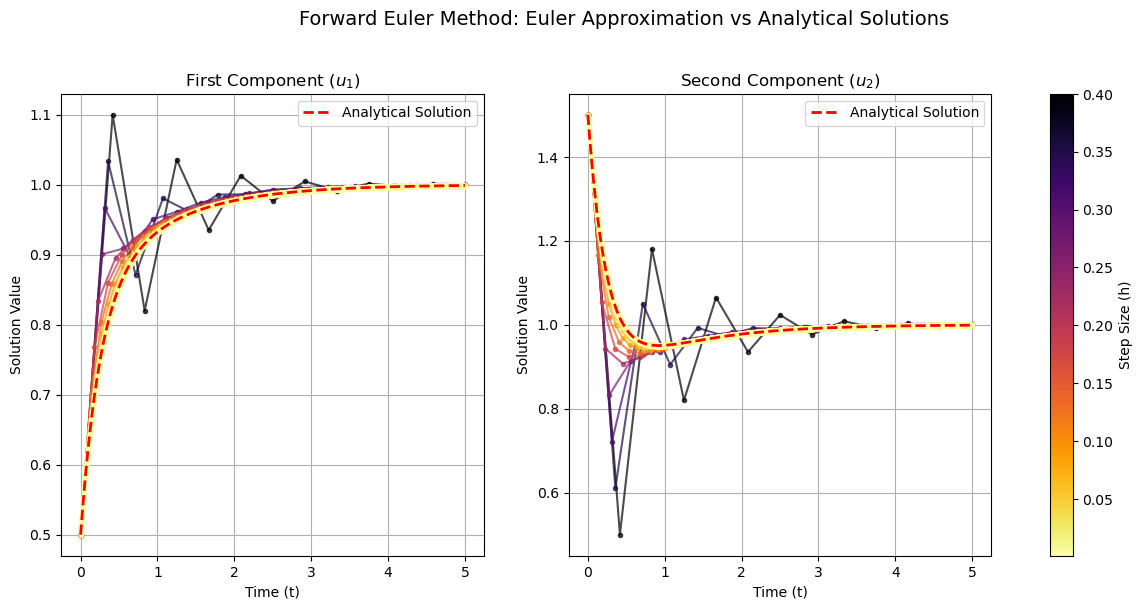

In [27]:
def du1_dt(u1, u2):
    """
    ODE function for the time derivative of u1: u1' = -2*u1 + u2 + 1
    
    Parameters:
    - u1 (float): The current value of u1.
    - u2 (float): The current value of u2.
    
    Returns:
    - (float): The time derivative of u1 based on the current values of u1 and u2.
    """
    return (-2*u1 + u2 + 1)

def du2_dt(u1, u2):
    """
    ODE function for the time derivative of u2: u2' = 2*u1 - 3*u2 + 1
    
    Parameters:
    - u1 (float): The current value of u1.
    - u2 (float): The current value of u2.

    Returns:
    - (float): The time derivative of u2 based on the current values of u1 and u2.
    """
    return (2*u1 - 3*u2 + 1)

def forward_euler(u10, u20, t0, tend, h):
    """
    Forward Euler method to numerically solve the system of ODEs.

    Parameters:
    - u10 (float): The initial value of u1 at time t0.
    - u20 (float): The initial value of u2 at time t0.
    - t0 (float): The initial time.
    - tend (float): The end time for the simulation.
    - h (float): The time step size.

    Returns:
    - t (numpy.ndarray): Array of time points from t0 to tend.
    - y (numpy.ndarray): Array of solutions, where each row contains the values [u1, u2] at the corresponding time point.
    """
    num_steps = int((tend - t0) / h)
    t = np.linspace(t0, tend, num_steps + 1)
    y = np.zeros((num_steps + 1, 2))
    y[0] = np.array([u10, u20])
    
    for i in range(num_steps):
        u1, u2 = y[i]
        y[i + 1] = np.array([
            u1 + h * du1_dt(u1=u1, u2=u2),
            u2 + h * du2_dt(u1=u1, u2=u2)
        ])
    
    return t, y

# Create figure plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Define h_values and color schema
h_values = np.linspace(0.4, 0.001, 10)
colors = plt.cm.inferno(np.linspace(0, 1, len(h_values)))

# Get analytical solution
t_analytical = np.linspace(0, 5, 1000)
u1_analytical = [u1(k1, k2, t) for t in t_analytical]
u2_analytical = [u2(k1, k2, t) for t in t_analytical]

# Initial conditions
u10 = u1(k1=k1, k2=k2, t=0)
u20 = u2(k1=k1, k2=k2, t=0)

# Plot Euler Approximations
for i, h in enumerate(h_values):
    t_numerical, y_numerical = forward_euler(u10, u20, t0=0, tend=5, h=h)
    ax1.plot(t_numerical, y_numerical[:, 0], 
             marker='o', markersize=3, color=colors[i], alpha=0.7)
    ax2.plot(t_numerical, y_numerical[:, 1], 
             marker='o', markersize=3, color=colors[i], alpha=0.7)

# Plot analytical solutions
ax1.plot(t_analytical, u1_analytical, '--', 
         color='red', linewidth=2, label='Analytical Solution')
ax2.plot(t_analytical, u2_analytical, '--', 
         color='red', linewidth=2, label='Analytical Solution')

# Plot elements
fig.suptitle('Forward Euler Method: Euler Approximation vs Analytical Solutions', 
             fontsize=14, y=1.02)
ax1.set_title('First Component ($u_1$)', fontsize=12)
ax2.set_title('Second Component ($u_2$)', fontsize=12)

for ax in [ax1, ax2]:
    ax.set_xlabel('Time (t)', fontsize=10)
    ax.set_ylabel('Solution Value', fontsize=10)
    ax.grid(True)
    ax.set_facecolor('white')
    ax.legend()

# Add colorbar
sm = plt.cm.ScalarMappable(cmap='inferno_r', norm=plt.Normalize(vmin=h_values.min(), vmax=h_values.max()))
cbar = fig.colorbar(sm, ax=[ax1, ax2])
cbar.set_label('Step Size (h)', fontsize=10)

plt.show()

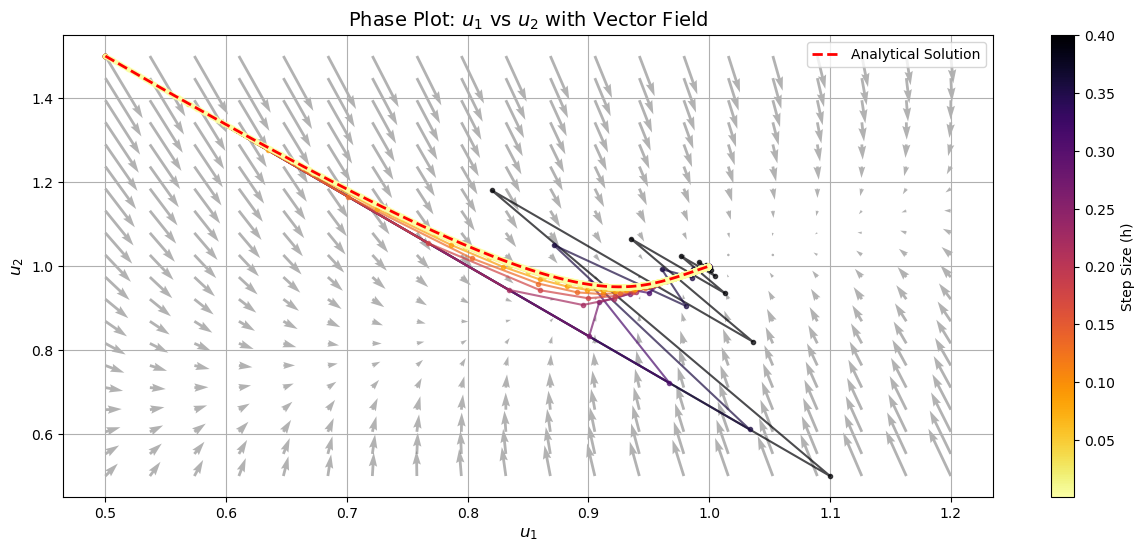

In [28]:
# Create the phase plot with vector arrows
fig, ax = plt.subplots(figsize=(15, 6))

# Define grid points for vector field
u1_vals = np.linspace(0.5, 1.2, 20)
u2_vals = np.linspace(0.5, 1.5, 20)

U1, U2 = np.meshgrid(u1_vals, u2_vals)
dU1 = du1_dt(U1, U2)
dU2 = du2_dt(U1, U2)

# Plot vector field (direction arrows)
ax.quiver(U1, U2, dU1, dU2, color='gray', alpha=0.6)

# Plot Euler approximations for different step sizes
for i, h in enumerate(h_values):
    t_numerical, y_numerical = forward_euler(u10, u20, t0=0, tend=5, h=h)
    ax.plot(y_numerical[:, 0], y_numerical[:, 1], 
            marker='o', markersize=3, color=colors[i], alpha=0.7)

# Plot analytical phase trajectory
ax.plot(u1_analytical, u2_analytical, 
        linestyle='--', color='red', linewidth=2, label='Analytical Solution')

# Plot settings
ax.set_title('Phase Plot: $u_1$ vs $u_2$ with Vector Field', fontsize=14)
ax.set_xlabel('$u_1$', fontsize=12)
ax.set_ylabel('$u_2$', fontsize=12)
ax.grid(True)
ax.set_facecolor('white')
ax.legend()

# Add colorbar for step size
sm = plt.cm.ScalarMappable(cmap='inferno_r', norm=plt.Normalize(vmin=h_values.min(), vmax=h_values.max()))
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('Step Size (h)', fontsize=10)

plt.show()

# Question 3.

**Consider the Gaussian distribution $p(x_1, x_2, x_3)$ with mean $\mu$ and covariance $\mathbf{\Sigma}$ being:**

$$\mathbf{\mu} = \begin{bmatrix} 1\\ 2\\ 3\\ \end{bmatrix}, \quad \mathbf{\Sigma} = \begin{bmatrix} 3 & 1 & -1\\ 1 & 4 & 2\\ -1 & 2 & 3 \end{bmatrix}$$

## (a.)

**What is the marginal distribution $p(x_1, x_3)$?**

Applying proposition 3.7 (Marginal density of Gaussian) from the notes, we have that:
$$\tilde{\mu} = \begin{bmatrix} 1\\3\end{bmatrix}, \tilde{\Sigma} = \begin{bmatrix} 3 & -1\\ -1 & 3 \end{bmatrix}$$

In other words,
$$ p(x_1, x_3) \sim \mathcal{N}(\tilde{\mu}, \tilde{\Sigma}) $$

In [29]:
def marginal_gaussian(mu, Sigma, index):
    """
    Returns the marginal mean vector and marginal covariance matrix for a subset of variables 
    from a multivariate Gaussian distribution.
    
    Parameters:
    - mu (numpy.ndarray): Original mean vector of the multivariate Gaussian distribution.
    - Sigma (numpy.ndarray): Original covariance matrix of the multivariate Gaussian distribution.
    - index (array-like): Array or list of indices specifying the subset of variables for which 
                          the marginal distribution is required.
    
    Returns:
    - marginal_mu (numpy.ndarray): 1-dimensional array representing the marginal mean vector 
                                   for the selected subset of variables.
    - marginal_Sigma (numpy.ndarray): 2-dimensional array representing the marginal covariance 
                                      matrix for the selected subset of variables.
    """
    marginal_mu = mu[index]                         # Partition the mean vector
    marginal_Sigma = Sigma[np.ix_(index, index)]    # Partition the covariance matrix

    return marginal_mu, marginal_Sigma

mu = np.array([1, 2, 3])
Sigma = np.array([[3, 1, -1], 
                  [1, 4, 2], 
                  [-1, 2, 3]])
marginal_mu, marginal_Sigma = marginal_gaussian(mu, Sigma, [0,2])

print("marginal mean:\n", marginal_mu)
print('\n')
print("marginal covariance matrix:\n", marginal_Sigma)

marginal mean:
 [1 3]


marginal covariance matrix:
 [[ 3 -1]
 [-1  3]]


## (b.)

**What is the conditional distribution $p(x_1, x_3 | x_2 = 2)$?**

Applying proposition 3.8 (Conditional density of Gaussian) from the notes, we have that:

$$\mu^* = \begin{bmatrix} \begin{bmatrix} 1\\ 3 \end{bmatrix}\\ 2\end{bmatrix}$$

$$\Sigma^* = \begin{bmatrix} \begin{bmatrix} 3 & -1\\ -1 & 3 \end{bmatrix} & \begin{bmatrix} 1 \\ 2\end{bmatrix}\\ \begin{bmatrix} 1 & 2 \end{bmatrix} & [4] \end{bmatrix}$$

where $\mu^*$ and $\Sigma^*$ are partitioned mean vector and covariance matrix respectively.

Now, we know that:
$$\bar{\mu} = \begin{bmatrix} 1\\ 3 \end{bmatrix} + \begin{bmatrix} 1 \\ 2\end{bmatrix} \cdot\frac{1}{4} (2 - 2) = \begin{bmatrix} 1\\ 3 \end{bmatrix} = \tilde{\mu}$$

\begin{equation*}
    \begin{split}
        \bar{\Sigma} &= \begin{bmatrix} 3 & -1\\ -1 & 3 \end{bmatrix} - \begin{bmatrix} 1 \\ 2\end{bmatrix} \cdot \frac{1}{4} \cdot \begin{bmatrix} 1 & 2\end{bmatrix}\\
        \\
                    &= \begin{bmatrix} 3 & -1\\ -1 & 3 \end{bmatrix} - \begin{bmatrix} 1/4 & 1/2\\ 1/2 & 1\end{bmatrix}\\
        \\
                    &= \begin{bmatrix} 11/4 & -3/2\\ -3/2 & 2 \end{bmatrix}\\   
    \end{split}
\end{equation*}

In [30]:
def conditional_gaussian(mu, Sigma, given_index, given_value):
    """
    Computes the conditional mean vector and conditional covariance matrix for a multivariate
    Gaussian distribution, given observed values for a subset of the variables.

    Parameters:
    - mu (numpy.ndarray): The original mean vector of the multivariate Gaussian distribution.
    - Sigma (numpy.ndarray): The original covariance matrix of the multivariate Gaussian distribution.
    - given_index (array-like): An array or list of indices specifying the subset of variables 
                                for which the values are given.
    - given_value (array-like): An array or list of observed values corresponding to the indices 
                                specified in `given_index`.

    Note: The lengths of `given_index` and `given_value` must match, as each index corresponds to 
          a given observed value.

    Returns:
    - conditional_mu (numpy.ndarray): A 1-dimensional array representing the conditional mean 
                                      vector for the remaining variables, conditioned on the 
                                      observed values.
    - conditional_Sigma (numpy.ndarray): A 2-dimensional array representing the conditional 
                                         covariance matrix for the remaining variables.
    """
    n = len(mu)
    all_index = np.arange(n)

    # Indices of the variables for which we are not given values (the ones to condition on)
    not_given_index = np.setdiff1d(all_index, given_index)

    # Partition the mean vector
    mu_1 = mu[not_given_index]
    mu_2 = mu[given_index]

    # Partition the covariance matrix
    Sigma_11 = Sigma[np.ix_(not_given_index, not_given_index)]
    Sigma_12 = Sigma[np.ix_(not_given_index, given_index)]
    Sigma_21 = Sigma[np.ix_(given_index, not_given_index)]
    Sigma_22 = Sigma[np.ix_(given_index, given_index)]

    # Compute the conditional mean and covariance
    conditional_mu = mu_1 + Sigma_12 @ np.linalg.inv(Sigma_22) @ (given_value - mu_2)
    conditional_Sigma = Sigma_11 - Sigma_12 @ np.linalg.inv(Sigma_22) @ Sigma_21

    return conditional_mu, conditional_Sigma

conditional_mu, conditional_Sigma = conditional_gaussian(mu, Sigma, 
                                                         given_index=[1], 
                                                         given_value=np.array([2]))

print("conditional mean:\n", conditional_mu)
print('\n')
print("conditional covariance matrix:\n", conditional_Sigma)

conditional mean:
 [1. 3.]


conditional covariance matrix:
 [[ 2.75 -1.5 ]
 [-1.5   2.  ]]


## (c.)

**If you are allowed to change the entries in the covariance matrix, which entries will you change that will make the marginal distribution $p(x_1, x_3)$ and the conditional distribution $p(x_1, x_3 | x_2 = 2)$ become the same?**

We know that as $x_2=2$ and $\mu_2=2$ and therefore $x_2-\mu_2=0$ which implies $\tilde{\mu} = \bar{\mu}$.

For equating $\tilde{\Sigma} = \bar{\Sigma}$, we can do the following:
\begin{equation*}
    \begin{split}
        \bar{\Sigma} &= \underbrace{\begin{bmatrix} 3 & -1\\ -1 & 3 \end{bmatrix}}_{=\tilde{\Sigma}} - \underbrace{\mathbf{\Sigma_{12}}\mathbf{\Sigma_{22}^{-1}}\mathbf{\Sigma_{21}}}_{=0}\\
    \end{split}
\end{equation*}

We can achieve this by equation $\mathbf{\Sigma_{12}}=\begin{bmatrix} 0\\ 0 \end{bmatrix}$ and $\mathbf{\Sigma_{21}}=\begin{bmatrix} 0 & 0 \end{bmatrix}$, i.e.,
$$\mathbf{\Sigma} = \begin{bmatrix} 3 & 0 & -1\\ 0 & 4 & 0\\ -1 & 0 & 3 \end{bmatrix}$$

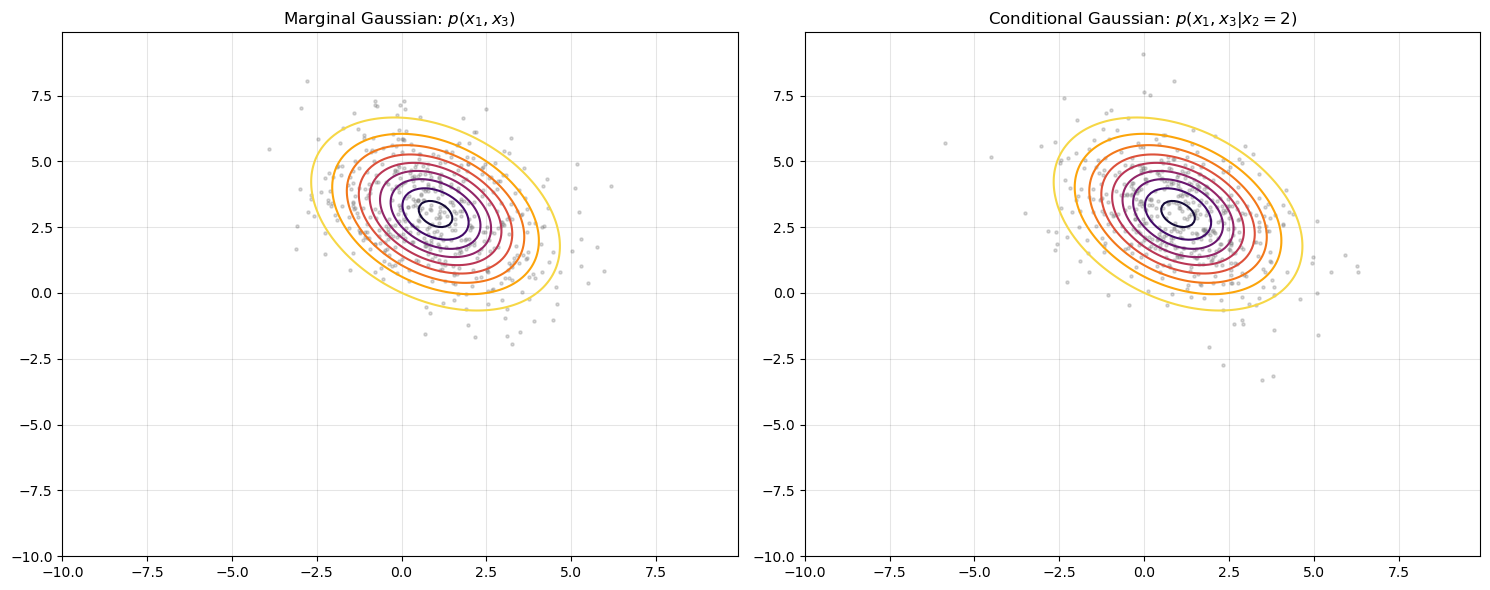

In [31]:
new_Sigma = np.array([[3, 0, -1], 
                      [0, 4, 0], 
                      [-1, 0, 3]])

# Compute the marginal and conditional distributions for x1, x3 given x2
marginal_mu, marginal_covariance = marginal_gaussian(mu=mu, Sigma=new_Sigma, index=[0, 2])
conditional_mu, conditional_covariance = conditional_gaussian(mu=mu, Sigma=new_Sigma, 
                                                              given_index=[1], given_value=np.array([2]))

# Create a grid for plotting
x1, x3 = np.mgrid[-10:10:.1, -10:10:.1]
pos = np.dstack((x1, x3))

# Define the distributions
rv_marginal = multivariate_normal(marginal_mu, marginal_covariance)
rv_conditional = multivariate_normal(conditional_mu, conditional_covariance)

# Generate random samples from the marginal and conditional distributions for overlaying scatter points
samples_marginal = np.random.multivariate_normal(marginal_mu, marginal_covariance, size=500)
samples_conditional = np.random.multivariate_normal(conditional_mu, conditional_covariance, size=500)

# Update the plot to have a white background
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6), facecolor='white')

# Marginal distribution (x1, x3)
ax[0].contour(x1, x3, rv_marginal.pdf(pos), levels=10, cmap='inferno_r')
ax[0].scatter(samples_marginal[:, 0], samples_marginal[:, 1], alpha=0.3, color='grey', s=5)
ax[0].set_title('Marginal Gaussian: $p(x_1, x_3)$')
ax[0].set_facecolor('white')
ax[0].grid(True, color='black', alpha=0.1)

# Conditional distribution (x1, x3 | x2 = 2)
ax[1].contour(x1, x3, rv_conditional.pdf(pos), levels=10, cmap='inferno_r')
ax[1].scatter(samples_conditional[:, 0], samples_conditional[:, 1], alpha=0.3, color='grey', s=5)
ax[1].set_title('Conditional Gaussian: $p(x_1, x_3 | x_2 = 2)$')
ax[1].set_facecolor('white')
ax[1].grid(True, color='black', alpha=0.1)

plt.tight_layout()
plt.show()

## Question 4.

**Devise a Monte Carlo method to compute $e = 2.71828...$, and conduct numerical experiments to illustrate the accuracy as a function of the number of samples.**

Presented below is a novel approach integrating Monte Carlo simulation with binary search to approximate Euler's number, $e$.

Consider the following relationship:
$$\int_{1}^{e} \frac{1}{x}\;dx = \bigg[\log(x)\bigg]_{1}^{e} = 1$$

Our objective is to estimate the upper limit of the integral such that the definite integral evaluates to 1.

To evaluate this integral using a Monte Carlo approach, we generate  uniformly distributed samples from the interval $[1, \text{mid}]$, where $\text{mid}=(\text{low}+\text{high})/2$. We then explicitly compute the expectation as follows:

\begin{equation*}
    \begin{split}
        \mathbb{E}\bigg[\frac{1}{X}\bigg] &= \int_{1}^{\text{mid}} \frac{1}{x} \cdot \underbrace{\frac{1}{\text{mid}-1}}_{\text{pdf of uniform $[0,\text{mid}]$}}\;dx\\
        \\
        \mathbb{E}\bigg[\frac{1}{X}\bigg] &= \frac{1}{\text{mid}-1} \int_{1}^{\text{mid}} \frac{1}{x}\;dx\\
        \\
        \mathbb{E}\bigg[\frac{1}{X}\bigg] &= \frac{1}{\text{mid}-1} \bigg[\text{log}(x)\bigg]_{1}^{\text{mid}}\\
        \\
        \mathbb{E}\bigg[\frac{1}{X}\bigg] &= \frac{\text{log}(\text{mid})}{\text{mid}-1}\\
        \\
        \underbrace{\mathbb{E}\bigg[\frac{1}{X}\bigg] \cdot (\text{mid}-1)}_{= \xi} &= \text{log}(\text{mid})
    \end{split}
\end{equation*}

Our goal is to determine the value of $\text{mid}$ such that $\xi=1$, i.e.,
$$ \xi = 1 \iff \mathbb{E}[1/X] \cdot (\text{mid}-1) = 1 \iff \text{log}(\text{mid}) = 1 \iff \text{mid}=e$$

To achieve this, we iteratively adjust the bounds using a binary search algorithm. We start with $\text{low}=1$ and $\text{high}=4$. Abstractly, $\text{low}$ and $\text{high}$ can be any real number which we know for sure is lesser than and greater than $e$.

* If the estimated value $\xi$ is greater than 1, we update the upper bound to $\text{high}=\text{mid}$. 

* If the estimated value $\xi$ is lesser than 1, we update the lower bound to $\text{low}=\text{mid}$. 

This process is repeated until $|\text{high} - \text{low}| < 0.01$, providing an estimate for $e$. It is evident that that the binary search converges more accurately depending on how accurate the estimate $\xi$ is. 

In [32]:
def monte_carlo_estimate_xi(M, mid):
    """
    Perform a Monte Carlo estimation of xi (the inverse of the uniform distribution mean).

    Parameters:
    - M (int): The number of Monte Carlo samples to draw from a uniform distribution.
    - mid (float): The upper bound of the uniform distribution (lower bound is fixed at 1).

    Returns:
    - (float): The Monte Carlo estimate of xi, calculated as the mean of 1 divided by the uniform samples, 
               scaled by the range (mid - 1).
    """
    return np.mean(1 / np.random.uniform(low=1, high=mid, size=M)) * (mid - 1)

def binary_search_for_e(M, low=1, high=4, tolerance=0.01):
    """
    Use a binary search to estimate the value of 'e' by solving the equation for xi = 1 
    using Monte Carlo estimation.

    Parameters:
    - M (int): The number of Monte Carlo samples to use in the estimation at each step.
    - low (float): The initial lower bound for the binary search (default is 1).
    - high (float): The initial upper bound for the binary search (default is 4).
    - tolerance (float): The stopping criterion for the binary search (default is 0.01).

    Returns:
    - (float): The estimated value of 'e' (the point where xi = 1) after performing binary search.
    """
    while np.abs(high - low) > tolerance:
        mid = (low + high) / 2
        xi = monte_carlo_estimate_xi(M=M, mid=mid)
        if xi > 1.0:
            high = mid
        else:
            low = mid
    return (low + high) / 2

def compute_estimates(sample_size):
    """
    Compute multiple estimates of 'e' using the binary search method with Monte Carlo estimation.

    Parameters:
    - sample_size (int): The number of Monte Carlo samples to use in each binary search.

    Returns:
    - (float): The mean of the estimated values of 'e' across multiple simulations.
    - (float): The standard deviation of the estimated values of 'e' across multiple simulations.
    """
    estimates = [binary_search_for_e(sample_size) for _ in range(100)]
    return np.mean(estimates), np.std(estimates)

# Generate more points for sample sizes using linear spacing
sample_sizes = np.arange(1, 20)  # Linearly spaced sample sizes for more data points
results = Parallel(n_jobs=-1)(delayed(compute_estimates)(M) for M in sample_sizes)

approx_soln = np.asarray([results[i][0] for i in range(len(results))])
df = pd.DataFrame({'sample_size': sample_sizes,  
                   'approx_soln': approx_soln, 
                   'abs_diff': np.abs(np.exp(1) - approx_soln)})

df.style.background_gradient(cmap='inferno', subset=['sample_size', 'approx_soln', 'abs_diff'])

,sample_size,approx_soln,abs_diff
0,1,3.034141,0.315859
1,2,2.854551,0.136269
2,3,2.861113,0.142831
3,4,2.731797,0.013515
4,5,2.797949,0.079667
5,6,2.835449,0.117167
6,7,2.768828,0.050546
7,8,2.758398,0.040117
8,9,2.739824,0.021542
9,10,2.726406,0.008124


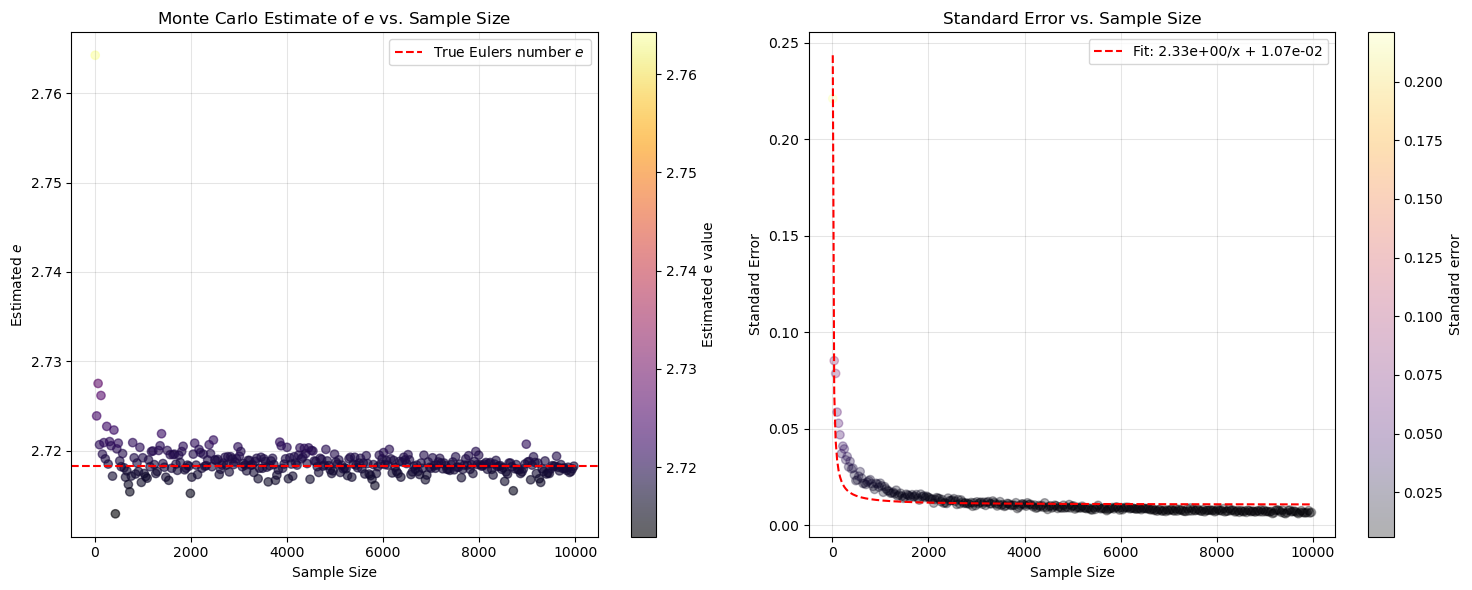

In [33]:
# Fit a curve of the form a/x + b to the standard errors
def inverse_fit(x, a, b):
    """
    A function to model the inverse relationship for curve fitting of the form a/x + b.

    This function is used to fit a curve to data points, where the relationship between 
    the independent variable x and the dependent variable follows an inverse pattern.

    Parameters:
    - x (numpy.ndarray or float): The independent variable (e.g., sample sizes).
    - a (float): The parameter representing the coefficient for the inverse term (a/x).
    - b (float): The parameter representing the intercept (constant term).

    Returns:
    - (numpy.ndarray or float): The modeled values a/x + b for the given x, a, and b.
    """
    return a / x + b

# Generate more points for sample sizes using linear spacing
sample_sizes = np.arange(10, 10000, 30)  # Linearly spaced sample sizes for more data points
results = Parallel(n_jobs=-1)(delayed(compute_estimates)(M) for M in sample_sizes)

# Extract e_estimates and standard_errors from results
e_estimates, standard_errors = zip(*results)

# Create subplots for visualization
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6), facecolor='white')

# Scatter plot: Monte Carlo estimate of e vs. sample size
sc0 = ax0.scatter(sample_sizes, 
                  e_estimates,
                  c=e_estimates,
                  cmap='inferno',
                  marker="o",
                  alpha=0.6)

ax0.axhline(y=np.exp(1), color="red", linestyle="--", label='True Eulers number $e$')
ax0.set_title("Monte Carlo Estimate of $e$ vs. Sample Size", fontsize=12)
ax0.set_xlabel("Sample Size", fontsize=10)
ax0.set_ylabel("Estimated $e$", fontsize=10)
ax0.grid(True, color="black", alpha=0.1)
ax0.set_facecolor('white')
ax0.legend()

# Using scipy's curve_fit to find optimum parameters a and b
popt, pcov = curve_fit(inverse_fit, sample_sizes, standard_errors)

# Plotting the fitted 1/x trend line
ax1.plot(sample_sizes, inverse_fit(sample_sizes, *popt), 
         'r--', label=f'Fit: {popt[0]:.2e}/x + {popt[1]:.2e}')

# Scatter plot: Standard error vs. sample size
sc1 = ax1.scatter(sample_sizes, 
                  standard_errors,
                  c=standard_errors,
                  cmap='inferno',
                  marker="o",
                  alpha=0.3)

ax1.set_title("Standard Error vs. Sample Size", fontsize=12)
ax1.set_xlabel("Sample Size", fontsize=10)
ax1.set_ylabel("Standard Error", fontsize=10)
ax1.grid(True, color="black", alpha=0.1)
ax1.set_facecolor('white')
ax1.legend()

plt.colorbar(sc0, ax=ax0, label='Estimated e value')
plt.colorbar(sc1, ax=ax1, label='Standard error')

plt.tight_layout()
plt.show()

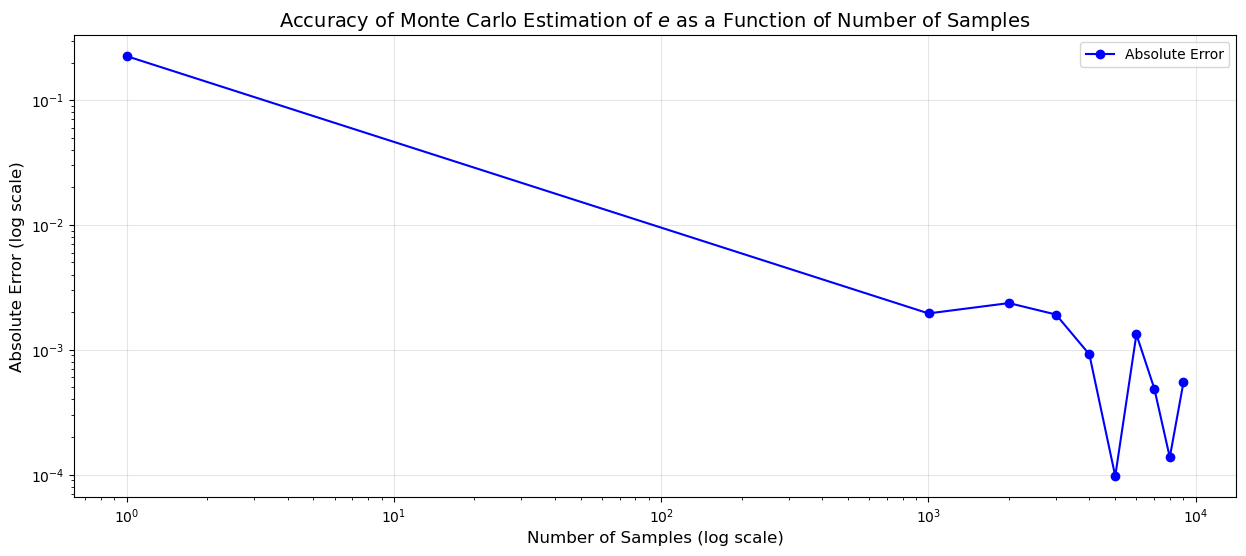

In [34]:
# Sample sizes to test
sample_sizes = range(1, 10000, 1000)

# Store mean estimates and absolute errors
mean_estimates = []
absolute_errors = []

# Run experiments for different sample sizes
for sample_size in sample_sizes:
    mean_estimate, _ = compute_estimates(sample_size)
    mean_estimates.append(mean_estimate)
    absolute_errors.append(np.abs(mean_estimate - np.exp(1)))

# Create figure with custom layout
fig, ax = plt.subplots(figsize=(15, 6))
fig.patch.set_facecolor('white')  # Set the figure background to white
ax.set_facecolor('white')         # Set the axis background to white

ax.plot(sample_sizes, absolute_errors, marker='o', color='b', label='Absolute Error')
ax.set_xscale('log')  # Log scale for better visualization
ax.set_yscale('log')
ax.set_xlabel('Number of Samples (log scale)', fontsize=12)
ax.set_ylabel('Absolute Error (log scale)', fontsize=12)
ax.set_title('Accuracy of Monte Carlo Estimation of $e$ as a Function of Number of Samples', fontsize=14)
ax.grid(True, color='black', alpha=0.1)
ax.legend()
ax.set_facecolor('white')

plt.show()

# Question 5.

**Show an SDE (and the associated parameters), which simultaneously satisfy the following two conditions:**

We know that, the linear Gaussian SDE is of the form:
$$dX_t = (-aX_t + f)\;dt + \sigma \; dW_t$$

## (a.)

**Starting from any finite initial value, the mean of the SDE will eventually converge to zero; and**

The long-term mean of an SDE will be:
$$\mu_{\infty} = \frac{f}{a}$$

For $f/a = 0$, it must be that $f=0$ and $a \neq 0$, i.e.,

$$dX_t = -aX_t\;dt + \sigma\;dW_t$$

## (b.)

**The variance of the SDE will blow up when time t → ∞.**

The long-term variance of an SDE will be:
$$\text{Var}_{\infty} = \frac{\sigma^2}{a}$$

For $\sigma^2/a = \infty$ and $a \neq 0$

This is possible if our $\sigma(t) = (\sigma_0)^2 \cdot t$ where $0<\sigma_0$, i.e., the diffusion term is time-dependent. 

Another way of interpreting this would be that the magnitude $\sigma(t) \cdot dW_t = (\sigma_0)^2 \cdot t\;dW_t$ increases as $t$ increases.

Arbitrarily, our SDE is as follows:
$$dX_t = (-a)X_t\;dt + (\sigma_0)^2 \cdot t\;dW_t$$

For the short-run, we have the following parameters:
* $a$: 0.1
* $T$: 10
* $N$: 1000
* $X_0$: 1
* $\sigma_0$: 1

The associated SDE is:
$$dX_t = -(0.1) X_t\;dt + t\;dW_t, X_0=1$$

<>:74: SyntaxWarning: invalid escape sequence '\c'
<>:74: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_26114/2254335716.py:74: SyntaxWarning: invalid escape sequence '\c'
  ax.set_title('Short-time Euler-Maruyama Simulation\n$dX_t = -(0.1) \cdot X_t \\; dt + (1)^2 \\cdot t \\; dW_t$, $X_0=1$')


Mean of X_t: -4.2498
Standard Deviation of X_t: 5.1307
Variance of X_t: 26.3239
Max of X_t: 5.1548
Min of X_t: -16.6145


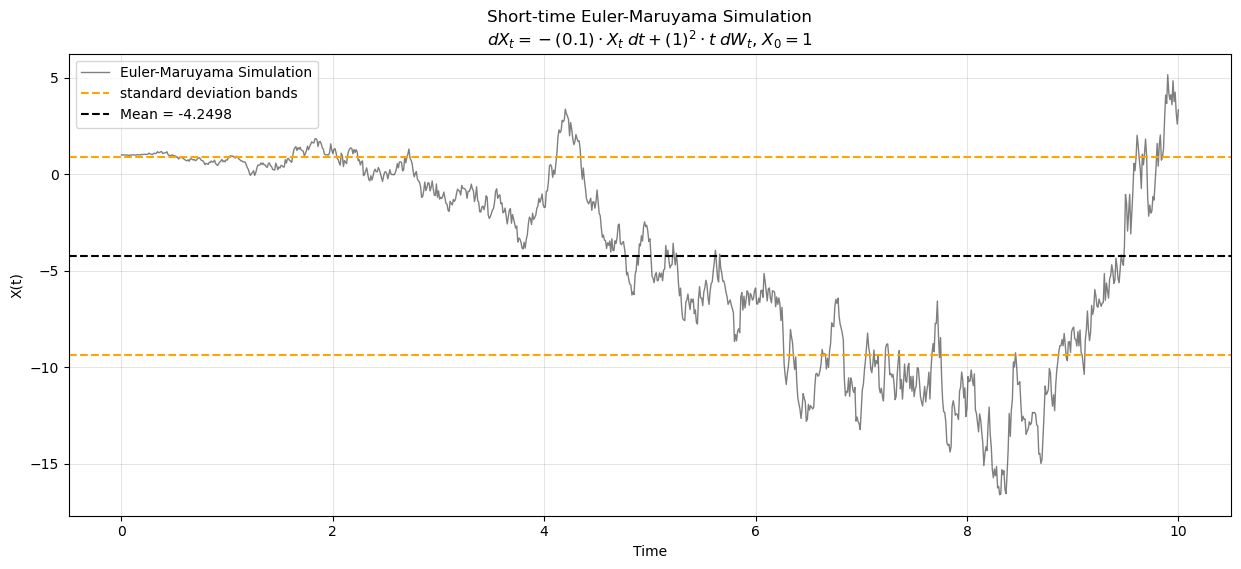

In [35]:
def dXt_conditional(a, Xt, dt, sigma, dWt):
    """
    SDE function for the time derivative of Xt: dX_t = -a X_t dt + sigma dW_t
    
    Parameters:
    - a (float): The drift coefficient, representing the strength of the mean-reverting term (-a X_t).
    - Xt (float): The current value of the process Xt.
    - dt (float): The time step size.
    - sigma (float): The time-dependent volatility (diffusion) coefficient.
    - dWt (float): The Wiener process increment (random term).
    
    Returns:
    - (float): The time derivative of Xt based on the current value, time step size, and random increment.
    """
    return -a * Xt * dt + sigma * dWt

def euler_maruyama_conditional(a, T, N, X0, sigma_0):
    """
    Euler-Maruyama method to numerically solve a stochastic differential equation (SDE):
    dX_t = -a X_t dt + sigma(t) dW_t, X_0 = X0.
    
    In this SDE, the drift term tends to 0 as the process evolves, and the variance grows without bound.
    
    Parameters:
    - a (float): The drift coefficient in the SDE (mean-reverting strength).
    - T (float): The total simulation time.
    - N (int): The number of time steps.
    - X0 (float): The initial value of the process Xt at time t=0.
    - sigma_0 (float): The initial diffusion coefficient. The diffusion (volatility) grows with time as sigma_0 * sqrt(t).
    
    Returns:
    - t (numpy.ndarray): Array of time points from 0 to T.
    - Xt (numpy.ndarray): Array of simulated values of the process Xt at each time step.
    """
    dt = T / N
    t = np.linspace(0, T, N+1)
    
    # Initialize the array for the solution
    Xt = np.zeros(N+1)
    Xt[0] = X0  # Initial condition
    
    # Simulate the process using Euler-Maruyama
    for i in range(N):
        dWt = np.random.normal(0, np.sqrt(dt))  # Wiener process increment
        sigma_t = (sigma_0**2) * t[i]  # Time-dependent diffusion
        Xt[i+1] = Xt[i] + dXt_conditional(a=a, Xt=Xt[i], dt=dt, sigma=sigma_t, dWt=dWt)
    
    return t, Xt

# Run simulation and collect the respective t and Xt values
a = 0.1             # Multiplier for shift-term
T = 10              # Small total time
N = 1000            # Number of steps
X0 = 1              # Initial condition
sigma_0 = 1         # Multiplier drift-Term
t, Xt = euler_maruyama_conditional(a=a, 
                                   T=T, 
                                   N=N, 
                                   X0=X0, 
                                   sigma_0=sigma_0)

# Calculate statistics
mean_xt, std_xt = statistics_TS(Xt)

# Create figure with custom layout
fig, ax = plt.subplots(figsize=(15, 6))
fig.patch.set_facecolor('white')  # Set the figure background to white
ax.set_facecolor('white')         # Set the axis background to white

ax.plot(t, Xt, alpha=0.5, color='black', label='Euler-Maruyama Simulation', linewidth=1)
ax.axhline(y=mean_xt-std_xt, color="orange", linestyle="--", label=f"standard deviation bands")
ax.axhline(y=mean_xt, color="black", linestyle="--", label=f"Mean = {mean_xt:.4f}")
ax.axhline(y=mean_xt+std_xt, color="orange", linestyle="--")
ax.set_title('Short-time Euler-Maruyama Simulation\n$dX_t = -(0.1) \cdot X_t \\; dt + (1)^2 \\cdot t \\; dW_t$, $X_0=1$')
ax.set_xlabel('Time')
ax.set_ylabel('X(t)')
ax.grid(True, color='black', alpha=0.1)
ax.legend()

plt.show()

For the long-run, we have the following parameters:
* $a$: 0.1
* $T$: 100000
* $N$: 10000000
* $X_0$: 1
* $\sigma_0$: 0.01

The associated SDE is:
$$dX_t = -(0.1) X_t\;dt + (0.01)^2 \cdot t\;dW_t, X_0=1$$

Mean of X_t: 0.4230
Standard Deviation of X_t: 129.9437
Variance of X_t: 16885.3611
Max of X_t: 905.3675
Min of X_t: -947.5086


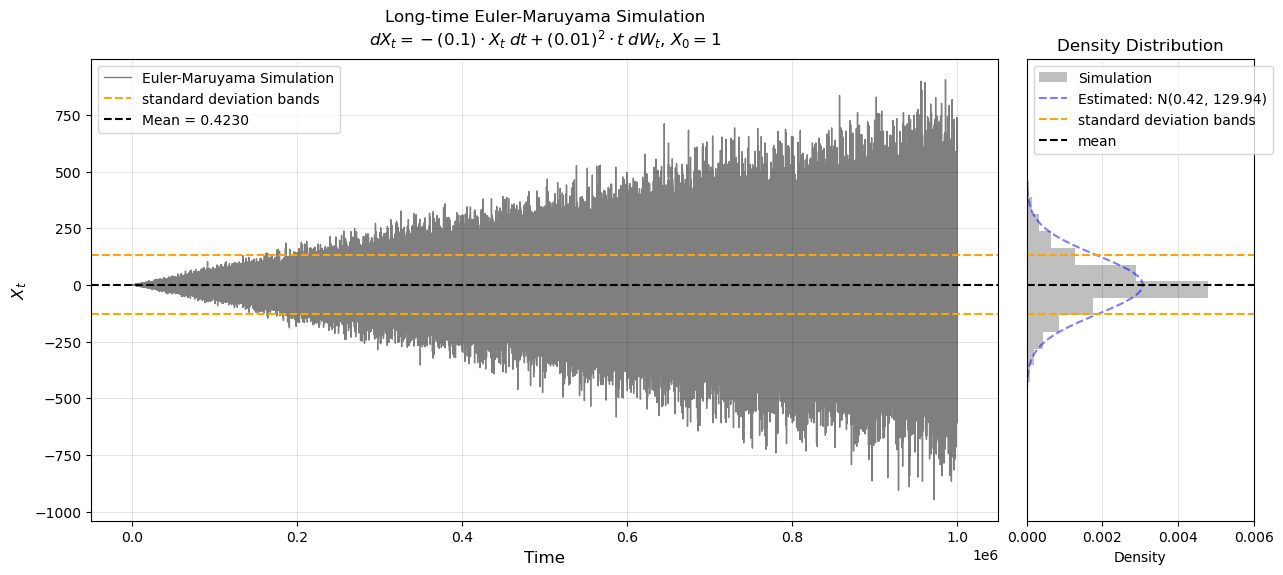

In [36]:
t, Xt = euler_maruyama_conditional(a=0.1, T=1000000, N=10000000, X0=1, sigma_0=0.01)

# Calculate statistics
mean_xt, std_xt = statistics_TS(Xt)

# Create figure with custom layout
fig = plt.figure(figsize=(15, 6))

# Create a GridSpec layout with different column widths and minimal spacing
gs = plt.GridSpec(1, 2, width_ratios=[4, 1], wspace=0.05)

# Left subplot: Time series (larger)
ax1 = plt.subplot(gs[0])
ax1.plot(t, Xt, alpha=0.5, color='black', label='Euler-Maruyama Simulation', linewidth=1)
ax1.axhline(y=mean_xt-std_xt, color="orange", linestyle="--", label=f"standard deviation bands")
ax1.axhline(y=mean_xt, color="black", linestyle="--", label=f"Mean = {mean_xt:.4f}")
ax1.axhline(y=mean_xt+std_xt, color="orange", linestyle="--")
ax1.set_title('Long-time Euler-Maruyama Simulation\n$dX_t = -(0.1) \\cdot X_t \\; dt + (0.01)^2 \\cdot t \\; dW_t$, $X_0=1$', pad=10)
ax1.set_xlabel('Time', fontsize=12)
ax1.set_ylabel('$X_t$', fontsize=12)
ax1.set_facecolor('white')
ax1.grid(True, color='black', alpha=0.1)
ax1.legend()

# Right subplot: Rotated histogram
ax2 = plt.subplot(gs[1])
# Create horizontal histogram
ax2.hist(Xt, bins=25, density=True, orientation='horizontal',
         alpha=0.5, color='grey', label='Simulation')

y = np.linspace(-750, 750, 100)

pdf2 = norm.pdf(y, mean_xt, std_xt)
ax2.plot(pdf2, y, alpha=0.5, color="blue",
         linestyle='--', label=f'Estimated: N({np.round(mean_xt, 2)}, {np.round(std_xt, 2)})')

ax2.axhline(y=mean_xt+std_xt, color="orange", linestyle="--", label="standard deviation bands")
ax2.axhline(y=mean_xt-std_xt, color="orange", linestyle="--")
ax2.axhline(y=mean_xt, color="black", linestyle='--', label='mean')
ax2.set_xlim(0, 0.006)
ax2.set_title('Density Distribution')
ax2.set_xlabel('Density')
ax2.set_ylabel('')
ax2.set_facecolor('white')
ax2.grid(True, color='black', alpha=0.1)
ax2.legend()

ylim = ax1.get_ylim()
ax2.set_ylim(ylim)
ax2.set_yticks([])

plt.show()